In [132]:
#Parkison's Disease Detection Dataset
"""
Created by  Max Little, Oxford University 
in collaboration with National centre for voice and speech,  Denver, Colorado

Date Donated: 2008-06-26

Citation: 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)
"""

#Data Set Characteristics
"""
Number of Instances: 197
Number of Attributes: 23
Attribute Characteristics: Real
Missing Values: None
"""

#Attribute Information:
"""
Matrix column entries (attributes):
Name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 
"""

"""
MDVP: Multidimensional Voice Program is a software that calculates 33 measures to analyze the fidelity of human voice
http://www.scielo.br/scielo.php?pid=S1516-18462015000401341&script=sci_arttext&tlng=en
"""

"""
Definition of key metrics:

Jitter: Random variation of phase causing uncertainity in signal frequency
- RAP: Relative average perturbation, avg difference between a period and the average of it and its two neighbors      
- PPQ: Period perturbation quotient, avg difference between a period and the average of it and 5 of its neighbors
- DDP: Average absolute difference of differences between jitter cycles

Shimmer: Variability of peak-peak amplitude in dB
- APQ3: 3-point amplitude perturbation quotient, 
- APQ5: 5-point amplitude perturbation quotient
- DDA: Average absolute difference between amplitudes of different period

NHR: Noise to harmonics ratio
HNR: Harmonics to Noise ratio

RPDE: Recurrence priod density entropy  measure
D2: Correlation dimension

PPE: Pitch Period Entropy

https://www.cs.upc.edu/~nlp/papers/far_jit_07.pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/

"""

#Data Set Information & Classification Task
"""
This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for those with PD.
"""

'\nThis dataset is composed of a range of biomedical voice measurements from \n31 people, 23 with Parkinson\'s disease (PD). Each column in the table is a \nparticular voice measure, and each row corresponds one of 195 voice \nrecording from these individuals ("name" column). The main aim of the data \nis to discriminate healthy people from those with PD, according to "status" \ncolumn which is set to 0 for healthy and 1 for those with PD.\n'

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import ListedColormap

from imblearn.over_sampling import SMOTE

# Importing several classifiers 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Importing other classes from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,KMeansSMOTE)

# To display all columns and all rows if necessary
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)

%matplotlib inline
random_seed = 42

In [134]:
# Read csv file & review data types
df = pd.read_csv("parkinsons.csv")
df.head(5)
#df.dtypes

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [135]:
# Renamed column headers to make them somewhat more readable from engineering perspective
col_list = ["Subject ID","F0avg","Fmax","Fmin","Jitter%","Jitter:Abs","Jitter:RAP","Jitter:PPQ","Jitter:DDP", "Shimmer","Shimmer:dB", "Shimmer:APQ3","Shimmer:APQ5","Shimmer:APQ","Shimmer:DDA","NHR","HNR","Result","RPDE","DFA","Spread1","Spread2","D2","PPE"]
dfx = pd.read_csv("parkinsons.csv",skiprows=1, names=col_list)
dfx

,Subject ID,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,Result,RPDE,DFA,Spread1,Spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [136]:
dfx.drop(dfx.columns[0], axis=1,inplace=True)
dfx

,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,Result,RPDE,DFA,Spread1,Spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [137]:
dfx.corr(method='pearson').sort_values('Result', ascending=False).head(20).loc[:,'Result']

Result          1.000000
Spread1         0.564838
PPE             0.531039
Spread2         0.454842
Shimmer         0.367430
Shimmer:APQ     0.364316
Shimmer:APQ5    0.351148
Shimmer:dB      0.350697
Shimmer:APQ3    0.347617
Shimmer:DDA     0.347608
D2              0.340232
Jitter:Abs      0.338653
RPDE            0.308567
Jitter:PPQ      0.288698
Jitter%         0.278220
Jitter:RAP      0.266668
Jitter:DDP      0.266646
DFA             0.231739
NHR             0.189429
Fmax           -0.166136
Name: Result, dtype: float64

In [138]:
X = dfx.drop('Result', axis=1)
y = dfx['Result']

###  See what we are dealing with here ..

In [139]:
y.value_counts()

1    147
0     48
Name: Result, dtype: int64

In [140]:
X.head(5)

,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,Spread1,Spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [141]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Result, dtype: int64

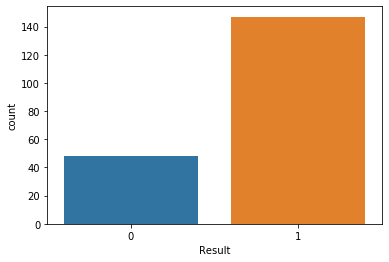

In [142]:
sns.countplot(y)
plt.show()

The data set is imbalanced, has 24% Minority class (non-Parkison patients).

# Homework Goals

### #1 Perform PCA and visualize the dominant contributing factors that explain variance

### #2 Perform t-SNE and compare that with PCA

In [143]:
# PCA - Principal Component Analysis overview

"""
Purpose: Dimensionality reduction & data visualization; Can speed up fitting of machine learning algorithms

The goal of reducing dimensionality is achieved by linear transformation of attribute space into a smaller feature
space where eigenvectors form the axes and the eigenvalues will dictate the relative significance of each of those
axes.

Eigenvectors with the smallest eigenvalues will bear the least amount of information about variance distribution.

Every principal component will ALWAYS be orthogonal to every other principal component.

Every PCA is statistically linearly independent of each other.

PCA is a method that brings together:

 - A measure of how each variable is associated with one another. (Covariance matrix.)
 - The directions in which our data are dispersed. (Eigenvectors.)
 - The relative importance of these different directions. (Eigenvalues.)
 
PCA combines our predictors and allows us to drop the eigenvectors that are relatively unimportant.

"""


# PCA process description

"""
STEP 1: Have tabular data organized with n rows and likely p+1 columns, 
where one column corresponds to your dependent variable (usually denoted Y) and p columns where each corresponds 
to an independent variable (the matrix of which is usually denoted X).


STEP 2: If a Y variable exists and is part of your data, then separate your data into Y and X, as defined above — 
we’ll mostly be working with X. (Note: if there exists no column for Y, PCA still works - goto STEP 3)


STEP 3: Take the matrix of independent variables X and, for each column, subtract the mean of that column from each 
entry. This ensures that each column has a mean of zero aka each column is now "MEAN CENTERED".


STEP 4: Decide on whether to standardize or not. Given the columns of X, are features with higher variance more 
important than features with lower variance, or is the importance of features independent of the variance? 
In this case, importance means how well that feature predicts Y. 
If the importance of features is independent of the variance of the features, then divide each observation in a 
column by that column’s standard deviation. 
This, combined with step 2, standardizes each column of X to make sure each column has mean zero and 
standard deviation 1. Call the mean centered (and possibly standardized) matrix Z.


STEP 5: Take the matrix Z, transpose it, and multiply the transposed matrix by Z. 
Mathematically, it would be ZᵀZ. The resulting matrix is the covariance matrix of Z.


STEP 6: Calculate the eigenvectors and their corresponding eigenvalues of ZᵀZ. 
The eigendecomposition of ZᵀZ into PDP⁻¹, where P is the matrix of eigenvectors and D is the diagonal matrix with 
eigenvalues on the diagonal and values of zero everywhere else. The eigenvalues on the diagonal of D will be 
associated with the corresponding column in P — that is, the first element of D is λ₁ and the corresponding 
eigenvector is the first column of P. This holds for all elements in D and their corresponding eigenvectors in P. 


STEP 7: Take the eigenvalues λ₁, λ₂, …, λp and sort them from largest to smallest. In doing so, sort the 
eigenvectors in P accordingly. For example, if λ₂ is the largest eigenvalue, then take the second column 
of P and place it in the first column position. In python,  this could be done automatically (need to check). 
Call this sorted matrix of eigenvectors P*. The columns of P* should be the same as the columns of P, but likely 
in a different order. Note that these eigenvectors are independent of one another.


STEP 8: Calculate Z* = ZP*. This new matrix, Z*, is a centered/standardized version of X but now each 
observation is a combination of the original variables, where the weights are determined by the eigenvector.
As a bonus, because our eigenvectors in P* are independent of one another, each column of Z* is also independent 
of one another!

STEP 9: Determine how many  features to keep vs how may to drop. This can be done by:

    - Only look at the top Eigenvalues by  sorting them: Eigenvectors with lowest Eigenvalues bear least information.
    
    - Calculate proportion of variance explained for each feature, pick a threshold and keep adding those features
    until that threshold is hit. 
    
    - Calculate proportion of variance explained for each feature, by plotting a SCREE plot. Look at the elbow of the
    SCREE plot for maximum drop of variance and look at how much cumulative variance they explain.
    
"""

'\nSTEP 1: Have tabular data organized with n rows and likely p+1 columns, \nwhere one column corresponds to your dependent variable (usually denoted Y) and p columns where each corresponds \nto an independent variable (the matrix of which is usually denoted X).\n\n\nSTEP 2: If a Y variable exists and is part of your data, then separate your data into Y and X, as defined above — \nwe’ll mostly be working with X. (Note: if there exists no column for Y, PCA still works - goto STEP 3)\n\n\nSTEP 3: Take the matrix of independent variables X and, for each column, subtract the mean of that column from each \nentry. This ensures that each column has a mean of zero aka each column is now "MEAN CENTERED".\n\n\nSTEP 4: Decide on whether to standardize or not. Given the columns of X, are features with higher variance more \nimportant than features with lower variance, or is the importance of features independent of the variance? \nIn this case, importance means how well that feature predicts Y. \

In [144]:
import numpy as np
covariant_matrix = np.cov(X.T)
print(covariant_matrix)

[[ 1.71313746e+03  1.51846524e+03  1.07458972e+03 -2.36789476e-02
  -5.50607773e-04 -9.35937186e-03 -1.28086437e-02 -2.80851395e-02
  -7.67796905e-02 -5.94805445e-01 -3.98038997e-02 -3.51756349e-02
  -5.45526186e-02 -1.19428553e-01 -3.67721273e-02  1.08342268e+01
  -1.65157078e+00 -1.02152815e+00 -1.86694260e+01 -8.61143944e-01
   2.81992114e+00 -1.38890589e+00]
 [ 1.51846524e+03  8.37070329e+03  3.38262412e+02  4.52817533e-02
  -9.30232714e-05  2.63860052e-02  2.30023511e-02  7.91364122e-02
   3.93569400e-03  7.74967572e-01 -3.47721223e-03 -1.09971280e-02
   7.65471131e-03 -1.04026471e-02  6.05599384e-01 -1.00797309e+01
  -1.06893362e+00 -1.73701663e+00 -7.64621667e+00 -2.25387992e-02
   6.17533239e+00 -5.73392917e-01]
 [ 1.07458972e+03  3.38262412e+02  1.89411341e+03 -2.95225543e-02
  -4.21028629e-04 -1.29832498e-02 -1.15065491e-02 -3.89375822e-02
  -1.18623862e-01 -1.01003076e+00 -6.66118556e-02 -5.29016658e-02
  -7.91338253e-02 -1.99820224e-01 -1.91158703e-01  4.06131543e+01
  -1.8

In [145]:
print (covariant_matrix.shape)

(22, 22)


In [146]:
eigen_values,eigen_vectors = np.linalg.eig(covariant_matrix)

In [147]:
print(eigen_vectors)

[[-2.22364991e-01 -5.89844226e-01  7.76167708e-01  9.77123250e-03
   9.37245030e-03  4.15128127e-03  1.54897118e-04  3.99280898e-04
  -4.36816116e-04 -5.09548206e-04 -2.09309686e-04 -2.40647252e-04
  -3.58090860e-06  1.39234151e-06 -2.57857141e-05 -8.24033023e-06
  -6.73865449e-06  1.79339660e-06  1.96804303e-07  2.18609803e-07
   1.56746011e-08 -1.01480991e-08]
 [-9.71437964e-01  2.01668765e-01 -1.25048543e-01  4.66162961e-04
  -7.67336363e-04  1.47179510e-04 -8.95197753e-05 -5.64359116e-05
  -4.92730315e-05 -9.92629877e-05  3.47181588e-05 -3.39601748e-06
  -1.29638774e-05 -1.11299389e-05  3.71609999e-06  4.21621847e-07
  -9.91533907e-08 -1.11631788e-06 -5.41705447e-07  6.25371327e-09
  -5.73853643e-10 -2.44775771e-09]
 [-8.28189323e-02 -7.81720694e-01 -6.17436105e-01 -2.86965462e-02
   1.03866858e-03 -1.09766864e-03 -7.50221819e-04  9.11047916e-05
   2.51219885e-04  1.10805331e-04  1.08640080e-04  4.77502178e-05
  -2.96390934e-05  8.90903144e-06 -2.90153193e-06 -6.27870793e-06
  -2.4

In [148]:
print(eigen_values)

[8.74714468e+03 2.61870559e+03 6.13396779e+02 1.91233320e+01
 4.79859534e-01 7.33504521e-02 1.22680678e-02 5.64269738e-03
 3.17337362e-03 1.38591161e-03 5.37344992e-04 4.23520456e-04
 7.08122711e-05 1.59183026e-05 7.72341398e-06 3.06228258e-06
 5.03561820e-07 2.05343137e-07 5.84538961e-08 2.61255858e-11
 5.37271805e-12 6.53572980e-12]


22
[0.7289926852958065, 0.21824461443936893, 0.05112088361602991, 0.0015937508327455224, 3.9991803331292306e-05, 6.113074037772553e-06, 1.0224286908876463e-06, 4.7026604287638796e-07, 2.6447100629523173e-07, 1.1550276871531893e-07, 4.478267858505459e-08, 3.529646825454979e-08, 5.9015403908988795e-09, 1.3266416174346332e-09, 6.436743076195691e-10, 2.5521260715570605e-10, 4.196716720067385e-11, 1.7113429615258935e-11, 4.871585443788195e-12, 2.177323184832763e-15, 5.44691941061312e-16, 4.477657907328158e-16]


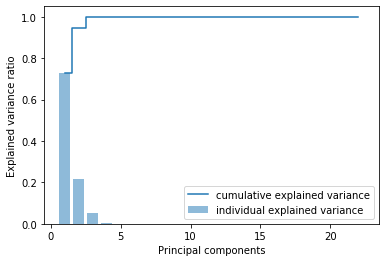

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline
tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values,reverse=True)]
print(len(var_exp))
print(var_exp)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,23),var_exp,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(1,23),cum_var_exp,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

## Note that 1st value explains 92% of total variance !
## visual enables relative importance of each PCA components

In [150]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3) 
principalComponents = pca.fit_transform(X) # this is 150x4
principalDf = pd.DataFrame(data = principalComponents, \
                           columns = ['PC1', 'PC2', 'PC3'])

In [151]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.72899269 0.21824461 0.05112088]


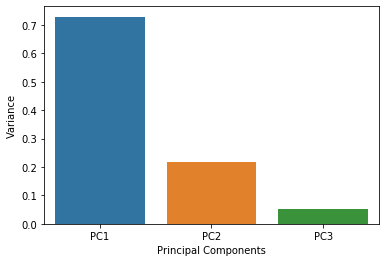

In [152]:
df2 = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'Principal Components':['PC1', 'PC2', 'PC3']})
sns.barplot(x='Principal Components',y="Variance", data=df2);

### First 2 PCA factors account for 93% of total variance, based on this data. However...

In [153]:
print (principalDf.shape)

(195, 3)


In [154]:
print(principalDf.head())
print(principalDf.tail())

         PC1        PC2        PC3
0 -49.702790 -44.495243  -3.940127
1 -54.357102 -11.019336  17.030055
2 -72.854413 -12.597009  17.917158
3 -66.304920 -14.114768  18.651016
4 -62.712834 -15.868356  19.190394
            PC1        PC2        PC3
190   35.519192 -12.334597 -24.944202
191   64.388862   0.318811 -52.564732
192   42.746464 -29.497127 -36.579349
193  200.623243 -46.449496 -35.226479
194   71.547360  -7.303870 -62.415452


###  ... look at the variation of PC1 values - from -72 to +200.. Is this unfairly influencing variance ?

In [155]:
finalDf = pd.concat([principalDf, dfx[['Result']]], axis = 1)

#pd.concat([df1, df2, df3])

In [156]:
print(finalDf.head())
print(finalDf.tail())

         PC1        PC2        PC3  Result
0 -49.702790 -44.495243  -3.940127       1
1 -54.357102 -11.019336  17.030055       1
2 -72.854413 -12.597009  17.917158       1
3 -66.304920 -14.114768  18.651016       1
4 -62.712834 -15.868356  19.190394       1
            PC1        PC2        PC3  Result
190   35.519192 -12.334597 -24.944202       0
191   64.388862   0.318811 -52.564732       0
192   42.746464 -29.497127 -36.579349       0
193  200.623243 -46.449496 -35.226479       0
194   71.547360  -7.303870 -62.415452       0


<Figure size 1152x720 with 0 Axes>

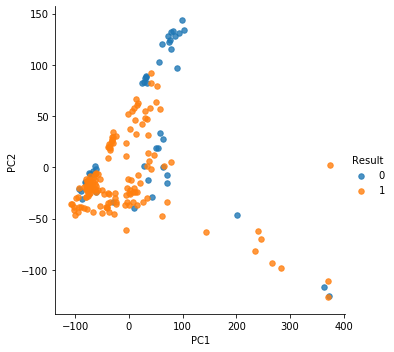

In [157]:
plt.figure(figsize=(16,10))
sns.lmplot( x="PC1", y="PC2",
  data=finalDf, 
  fit_reg=False, 
  hue='Result', # color by Result
  legend=True,
  scatter_kws={"s": 30}) # specify the point size

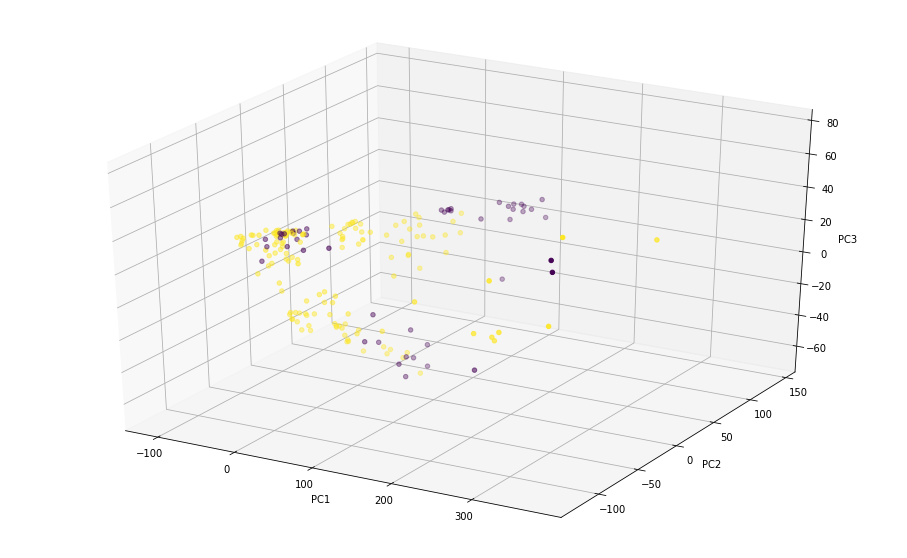

In [158]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=finalDf["PC1"], 
    ys=finalDf["PC2"], 
    zs=finalDf["PC3"], 
    c=finalDf["Result"], 
#    cmap='YlGnBu'
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

### Q) What happens if you standardize entire dataset..

In [159]:
scaler = StandardScaler()

Xs = scaler.fit_transform(X)
covariant_matrix2 = np.cov(Xs.T)
print(covariant_matrix2)
print (covariant_matrix2.shape)

[[ 1.00515464  0.40305161  0.5996205  -0.1186109  -0.38399586 -0.07658657
  -0.1127436  -0.07660554 -0.09888083 -0.07412257 -0.09520529 -0.07104612
  -0.07817472 -0.09521987 -0.02209408  0.05944926 -0.38587273 -0.44831233
  -0.41587084 -0.25073587  0.17889693 -0.37427574]
 [ 0.40305161  1.00515464  0.08538914  0.10261257 -0.02934884  0.09767753
   0.09159592  0.09765064  0.00229299  0.04368921 -0.00376255 -0.01004831
   0.00496243 -0.00375213  0.16461056 -0.02502146 -0.11298291 -0.34486526
  -0.07705294 -0.00296884  0.1772317  -0.06990147]
 [ 0.5996205   0.08538914  1.00515464 -0.14064012 -0.27924728 -0.10103746
  -0.09632233 -0.10100566 -0.14528839 -0.11970251 -0.15152355 -0.10161572
  -0.10784648 -0.15151373 -0.1092306   0.21193776 -0.40220566 -0.05066613
  -0.39689271 -0.24508626 -0.10114779 -0.34182429]
 [-0.1186109   0.10261257 -0.14064012  1.00515464  0.94053725  0.9953801
   0.97927833  0.99538073  0.77302748  0.8084351   0.75047378  0.72930101
   0.76216379  0.75048381  0.91163

In [160]:
eigen_values2,eigen_vectors2 = np.linalg.eig(covariant_matrix2)
print(eigen_vectors2)
print(eigen_values2)

[[ 5.33311130e-02  5.53401031e-01 -1.28288111e-01  1.31228487e-01
  -1.15094795e-01  1.47668607e-01  3.50564702e-03  2.16748419e-01
  -6.41927021e-02  6.45323415e-01  1.07077243e-01  2.56184223e-01
  -1.36797666e-01 -4.81187822e-02  6.87699486e-02 -2.20928548e-01
   2.53487041e-03 -1.21708375e-02  5.28913098e-02  7.82107987e-04
  -1.74818173e-04 -1.70057436e-05]
 [-6.71250123e-03  3.48781527e-01 -2.67643023e-01 -2.40989730e-01
  -1.87710104e-01 -7.19036479e-01 -3.69740613e-01  5.42451486e-02
   1.53286499e-01 -1.73705882e-01  6.74808783e-03 -2.93302048e-03
   3.45067705e-03  2.03348892e-02  2.66327411e-02 -1.39487222e-03
   4.20661561e-02  7.02082859e-03  5.06379199e-05 -4.26713584e-03
  -1.99048708e-05  1.45446017e-05]
 [ 6.38194233e-02  3.95480272e-01  2.32845237e-01  2.20075169e-01
  -2.85826110e-01  4.67681456e-01 -4.55281251e-01 -7.37119626e-03
   7.93236333e-02 -4.59493957e-01  7.26473658e-02 -5.80728684e-02
   2.58453775e-02  2.58969117e-02  6.25574989e-03  2.65832451e-02
  -1.8

22
[0.5890050414900366, 0.11299430050727352, 0.0700922613111593, 0.06659028178154483, 0.04426891342320763, 0.03314129151082037, 0.02510204049028712, 0.016472878849559065, 0.013174461114745623, 0.01018755818409145, 0.00638932477817472, 0.004765515080301889, 0.0031698604107813755, 0.0017348309361498435, 0.0010005314946926224, 0.0008085244780443668, 0.0005661999034400564, 0.0003279152641189796, 0.00015893488171025448, 4.9316157202995494e-05, 1.6447028019881234e-08, 1.5056291312312225e-09]


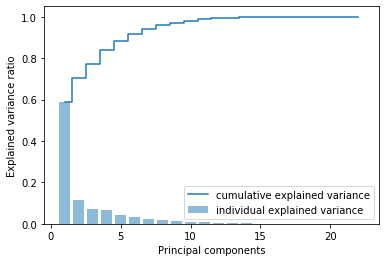

In [161]:
tot2 = sum(eigen_values2)
var_exp2 = [(i/tot2) for i in sorted(eigen_values2,reverse=True)]
print(len(var_exp2))
print(var_exp2)
cum_var_exp2 = np.cumsum(var_exp2)

plt.bar(range(1,23),var_exp2,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(1,23),cum_var_exp2,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [162]:
pca5 = PCA(n_components=5) 
principalComponents5 = pca5.fit_transform(Xs) # this is 150x4
principalDf5 = pd.DataFrame(data = principalComponents5, \
                           columns = ['PC1', 'PC2', 'PC3','PC4','PC5'])

In [163]:
print('Explained variation per principal component: {}'.format(pca5.explained_variance_ratio_))

Explained variation per principal component: [0.58900504 0.1129943  0.07009226 0.06659028 0.04426891]


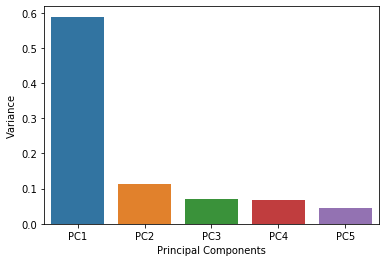

In [164]:
df3 = pd.DataFrame({'Variance':pca5.explained_variance_ratio_,
             'Principal Components':['PC1', 'PC2', 'PC3', 'PC4', 'PC5']})
sns.barplot(x='Principal Components',y="Variance", data=df3);

In [165]:
print (principalDf5.shape)
#principalDf5.head(5)
finalDf5 = pd.concat([principalDf5, dfx[['Result']]], axis = 1)
finalDf5.tail(15)

(195, 5)


,PC1,PC2,PC3,PC4,PC5,Result
180,-1.654073,0.242056,-1.201629,-0.853666,-0.383808,1
181,-1.641601,-0.321702,-0.292299,-0.371875,-1.275900,1
182,-2.310778,0.346098,-1.467601,-0.658413,-0.114842,1
183,-1.440250,-1.340182,0.318950,0.705199,1.031078,0
184,-0.806989,-1.237969,1.027088,1.524878,0.758100,0
185,-2.168310,-1.126453,0.612749,1.031870,1.258231,0
186,-1.928682,0.933509,1.341913,2.329622,0.548682,0
187,-2.992493,0.866826,1.435936,1.950795,0.492305,0
188,-3.018454,-1.071902,-0.060941,1.075162,1.685315,0
189,-0.568768,1.510895,0.253839,0.783247,1.206757,0


<Figure size 1152x720 with 0 Axes>

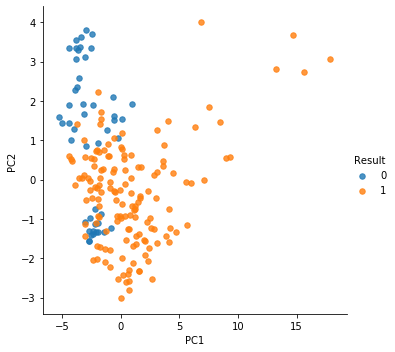

In [166]:
plt.figure(figsize=(16,10))
sns.lmplot( x="PC1", y="PC2",
  data=finalDf5, 
  fit_reg=False, 
  hue='Result', # color by Result
  legend=True,
  scatter_kws={"s": 30}) # specify the point size

Can Standardization influence PCA significantly ?
### Attempting PCA impact on classification w/ and w/o standardization

In [167]:
"""
Function to calculate evaluation metrics: accuracy, recall, precision and f1 scores
"""

def metrics(actual, prediction):
    accuracy = accuracy_score(actual, prediction)
    recall = recall_score(actual, prediction)
    precision = precision_score(actual, prediction)
    f1score = f1_score(actual, prediction)
    print ('accuracy: {}, recall: {}, precision: {}, f1-score: {}'.format(accuracy, recall, precision, f1score))

In [168]:
# Splitting original data into test, train sets  w/ stratify

x_train, x_test, y_train, y_test = train_test_split(dfx.drop('Result', axis=1), dfx['Result'], test_size = 0.30, random_state=random_seed, stratify=dfx['Result'])
print ("TRAIN DATA SHAPE: ", x_train.shape)
print ("TEST DATA SHAPE: ", x_test.shape)
print (y_train.shape, y_test.shape)

TRAIN DATA SHAPE:  (136, 22)
TEST DATA SHAPE:  (59, 22)
(136,) (59,)


In [169]:
## Standardization

# Employing standardscaler from SKLearn
scaler = StandardScaler()

# Fit on training set only - very important step..to avoid data leakage, its important to do 
# pre-processing on the training data set only and use those models on the  test data set

"""
A very common error that people make is to leak information in the data pre-processing 
step of machine learning. It is essential that these transformations only have knowledge 
of the training set, even though they are applied to the test set as well. 

For example, if you decide that you want to run PCA as a pre-processing step, you should 
fit your PCA model on only the training set. Then, to apply it to your test set, you 
would only call its transform method on the test set. 

If, instead, you fit your pre-processor on the entire data-set, you will leak information 
from the test set, since the parameters of the pre-processing model will be fitted with 
knowledge of the test set.
"""

scaler.fit(x_train)

# Apply transform to both training set and the test set.
x_trainsc = scaler.transform(x_train)
x_testsc = scaler.transform(x_test)

In [170]:
# Estimate the number of components needed to explain 95% variance

# vvip -->  Once again, to avoid data leakage, its important to do 
# pre-processing on the training data set only and use those models

pcasc = PCA(.95)
pcasc.fit(x_trainsc)
print(pcasc.n_components_)

pca2 = PCA(.95)
pca2.fit(x_train)
print(pca2.n_components_)


# note that after standardization, the number of components needs to explain 90% variance has gone up.. this is because
# variance is more evenly captured among other features !

8
3


In [171]:
# Apply the PCA fit transformation of train & test sets separately 

X_trainPCS = pcasc.transform(x_trainsc)
X_testPCS = pcasc.transform(x_testsc)

X_trainPC = pca2.transform(x_train)
X_testPC = pca2.transform(x_test)

In [174]:
# Visualize variance explained per PC, on the training set only.. figure out number of PCA components
# using above estimate to explain 95% 

principalDfx = pd.DataFrame(data = X_trainPCS, \
                           columns = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8'])
print('Explained variation per principal component for standardized training set: {}'.format(pcasc.explained_variance_ratio_))
print('\nExplained variation per principal component for standardized entire data set: {}'.format(pca5.explained_variance_ratio_))

Explained variation per principal component for standardized training set: [0.59090717 0.11534231 0.07140236 0.06425385 0.04496608 0.03196076
 0.02481915 0.01692759]

Explained variation per principal component for standardized entire data set: [0.58900504 0.1129943  0.07009226 0.06659028 0.04426891]


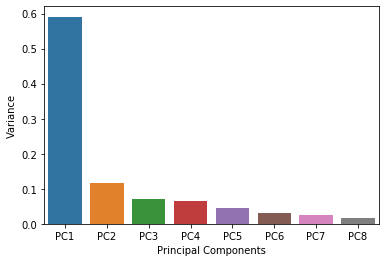

In [173]:
dfx = pd.DataFrame({'Variance':pcasc.explained_variance_ratio_,
             'Principal Components':['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8']})
sns.barplot(x='Principal Components',y="Variance", data=dfx);

In [42]:
# Have classifier models instantiated into two variables
rfs = RandomForestClassifier(n_estimators=50, random_state=random_seed)
rf = RandomForestClassifier(n_estimators=50, random_state=random_seed)

# Fit models separately to training result
rfs.fit(X_trainPCS, y_train)
rf.fit(X_trainPC, y_train)

# Predictions using test data
predsc = rfs.predict(X_testPCS) # w/ standardization
pred = rf.predict(X_testPC) # w/o standardization

# Calculate performance metrics of predicted vs y-of-actual-test-data
print("results w/o standardization:")
metrics(y_test, pred)
print("\nresults w/ standardization:")
metrics(y_test, predsc)

results w/o standardization:
accuracy: 0.7796610169491526, recall: 0.8863636363636364, precision: 0.8297872340425532, f1-score: 0.8571428571428571

results w/ standardization:
accuracy: 0.8983050847457628, recall: 1.0, precision: 0.88, f1-score: 0.9361702127659575


Significant improvement in all metrics achieved due to Standardization prior to PCA !

### #2 Performing t-SNE and its comparison w/ PCA

In [ ]:
# t-SNE overview
"""
- t-Distributed Stochastic Neighbor Embedding (t-SNE) is another technique for dimensionality reduction 
and is particularly well suited for the visualization of high-dimensional datasets. 

- Contrary to PCA it is not a mathematical technique but a probablistic one. 

- Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only 
a few thousand input objects; beyond that, learning becomes too slow to be practical (and the memory requirements 
become too large)


Pros:
- Another way to review classification

Cons:
- too slow for higher dimensional data. It is highly recommended to use another 
dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data) to reduce the number 
of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.

- t-SNE doesnt have separate FIT & Transform functions in python; so, no data-leakage-free method available to 
train data separately from test data set for predictive analysis. Hence, confine it only to data visualization.
"""

In [44]:
from sklearn.manifold import TSNE

In [59]:
tsne = TSNE(n_components=2, learning_rate = 900, perplexity=20, n_iter=1500)
Xs_tsne = tsne.fit_transform(x_trainsc)  

print (Xs_tsne)

[[-159.8689    -185.14758  ]
 [ 139.612      251.39734  ]
 [ -73.14095   -348.6949   ]
 [ 125.54165    -16.018557 ]
 [-120.92233    234.3297   ]
 [ -64.40993   -457.0296   ]
 [ 127.1593     439.9145   ]
 [   6.591361  -372.00662  ]
 [ -64.31051   -417.2155   ]
 [ -76.0702    -139.88365  ]
 [  18.376009    -6.9057875]
 [-120.5755    -179.42258  ]
 [ 112.63561     95.8903   ]
 [ 204.83232   -114.91666  ]
 [ 124.142784  -228.04114  ]
 [-101.76835   -131.48218  ]
 [ -30.14262   -362.8195   ]
 [  37.571163   176.32953  ]
 [ 158.51752    425.14307  ]
 [ 112.51573    230.58685  ]
 [-169.37346   -156.10028  ]
 [-174.07436   -116.75797  ]
 [ 224.25919    -84.34924  ]
 [-191.15057   -191.48111  ]
 [-137.382     -148.39098  ]
 [   7.0973034  101.26096  ]
 [ 189.54218     24.098068 ]
 [  42.192215   262.65503  ]
 [  -8.86455   -182.20868  ]
 [ 153.56316     49.59389  ]
 [ -73.292076   170.36153  ]
 [ -98.662415  -474.5919   ]
 [  68.220245    26.4421   ]
 [ -15.807955    77.68526  ]
 [ 117.35908  

In [60]:
tsneDf = pd.DataFrame(data = Xs_tsne, \
                           columns = ['DIM1', 'DIM2'])
resDf = pd.DataFrame(data=y_train,columns=['Result'])
resDf.head(5)

,Result
174,0
20,1
111,1
109,1
55,1


In [61]:
#finalDf = pd.concat([principalDf, dfx[['Result']]], axis = 1)
final_tsneDf=pd.concat([tsneDf,resDf],axis=1)
final_tsneDf.head()

,DIM1,DIM2,Result
0,-159.868896,-185.147583,1.0
1,139.612000,251.397339,NaN
2,-73.140953,-348.694885,1.0
3,125.541649,-16.018557,NaN
4,-120.922333,234.329697,1.0


In [62]:
final_tsneDf['Result'] = final_tsneDf['Result'].fillna(0)
final_tsneDf.head()

,DIM1,DIM2,Result
0,-159.868896,-185.147583,1.0
1,139.612000,251.397339,0.0
2,-73.140953,-348.694885,1.0
3,125.541649,-16.018557,0.0
4,-120.922333,234.329697,1.0


<Figure size 1152x720 with 0 Axes>

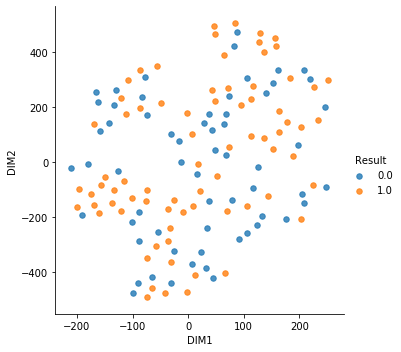

In [63]:
plt.figure(figsize=(16,10))
sns.lmplot( x="DIM1", y="DIM2",
  data=final_tsneDf, 
  fit_reg=False, 
  hue='Result', # color by Result
  legend=True,
  scatter_kws={"s": 30}) # specify the point size

In [56]:
Xs = scaler.fit_transform(X)
#print (Xs.shape)
tsne2 = TSNE(n_components=2, learning_rate = 900, perplexity=20, n_iter=1000, method = 'barnes_hut')
X_tsne = tsne2.fit_transform(Xs)

In [57]:
tsneDf2 = pd.DataFrame(data = X_tsne, \
                           columns = ['DIM1', 'DIM2'])
resDf2 = pd.DataFrame(data=y,columns=['Result'])
final_tsneDf2=pd.concat([tsneDf2,resDf2],axis=1)
final_tsneDf2.tail()

,DIM1,DIM2,Result
190,46.918743,107.541336,0
191,109.388794,4.220468,0
192,142.912628,10.456326,0
193,131.914459,30.809429,0
194,104.619522,21.719435,0


<Figure size 1152x720 with 0 Axes>

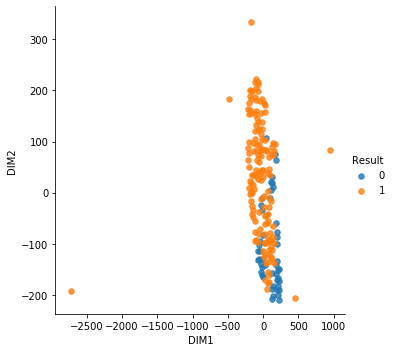

In [58]:
plt.figure(figsize=(16,10))
sns.lmplot( x="DIM1", y="DIM2",
  data=final_tsneDf2, 
  fit_reg=False, 
  hue='Result', # color by Result
  legend=True,
  scatter_kws={"s": 30}) # specify the point size

### Comparison of all manifold learning methods

LLE: 0.035 sec
LTSA: 0.035 sec
Hessian LLE: 0.058 sec
Modified LLE: 0.044 sec
Isomap: 0.018 sec
MDS: 0.062 sec
SE: 0.012 sec
t-SNE: 0.59 sec


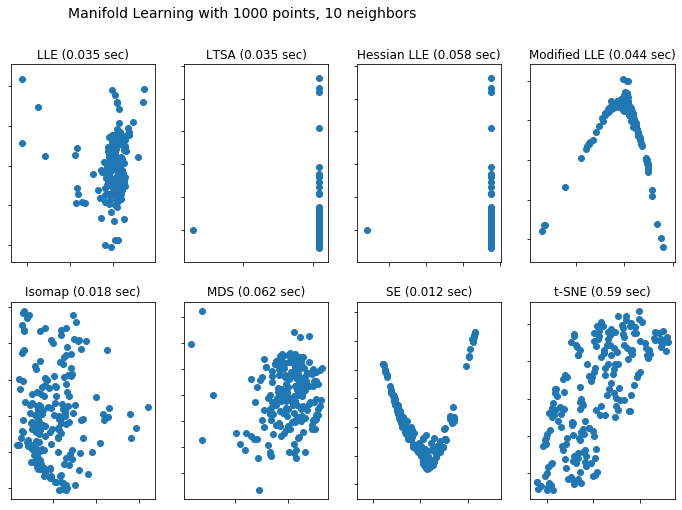

In [64]:
from sklearn import manifold, datasets
from collections import OrderedDict
from functools import partial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from time import time


t = np.arange(195)
n_points = 1000
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

Xs = scaler.fit_transform(X)

# Add 3d scatter plot
#ax = fig.add_subplot(251, projection='3d')
#ax.scatter(Xs[:, 0], Xs[:, 1], Xs[:, 2])
#ax.view_init(4, -72)

LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, 
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(Xs)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1])
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()